In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

In [2]:
#warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
df=pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## exploring the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

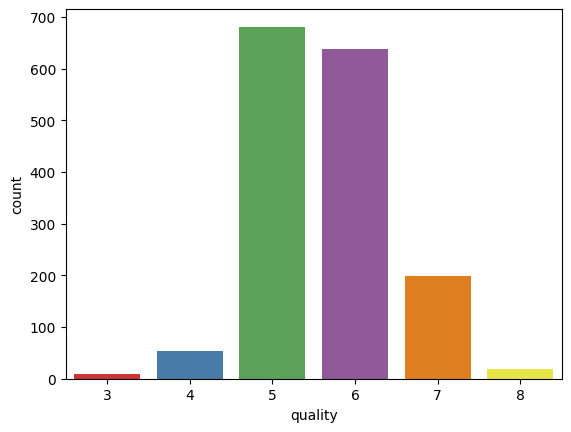

In [7]:
sns.countplot(data=df,x='quality',palette='Set1')
plt.show()

In [8]:
fig=px.histogram(df,
                 x='volatile acidity',
                 color='quality',
                 nbins=25,
                 marginal="box",
                 title='Distribution of volatile acidity and wine quality'
                 )
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig=px.histogram(df,
                 x='citric acid',
                 color='quality',
                 marginal="box",
                 title='Distribution of citric acid  and wine quality'
                 )
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
df_corr = df.corr(numeric_only=True)
df_corr.style

In [11]:
df_rank= df_corr['quality'].sort_values(ascending = False)
df_rank

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [12]:
fig=px.histogram(df,
                 x='alcohol',
                 color='quality',
                 marginal="box",
                 title='Distribution of alcohol  and wine quality'
                 )
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig=px.scatter(df,
                 x='alcohol',
               y='sulphates',
                 color='quality',
                 title='alcohol vs sulphates  and wine quality'
                 )
fig.update_layout(bargap=0.1)
fig.show()

## splitting the data into training and testing sets

In [14]:
df1=df

In [15]:
x=df1.iloc[:,:11]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [16]:
y=df1.iloc[:,11]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [17]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=43)  

# building and testing the model

### Aporach -1 predecting  wine quality using  classification 

##  RandomForestClassifier  

In [19]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
classifier= RandomForestClassifier(random_state=43)  
classifier.fit(x_train, y_train)  

RandomForestClassifier(random_state=43)

In [20]:
print('Classification report on train data:\n')
y_pred = classifier.predict(x_train)
print(classification_report(y_pred, y_train))

Classification report on train data:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       502
           7       1.00      1.00      1.00       154
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [21]:
print("Classification report on test data:\n")
y_pred = classifier.predict(x_test)
print(classification_report(y_pred, y_test,zero_division=0.0))

Classification report on test data:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.80      0.72      0.76       145
           6       0.68      0.67      0.68       138
           7       0.62      0.80      0.70        35
           8       1.00      0.50      0.67         2

    accuracy                           0.71       320
   macro avg       0.52      0.45      0.47       320
weighted avg       0.73      0.71      0.72       320



In [22]:
accuracy=accuracy_score(y_true=y_test,y_pred=classifier.predict(x_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Test data: 70.94


## DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(x_train, y_train)
print('Classification report on test data:\n')
y_pred = model_dt.predict(x_test)
print(classification_report(y_pred, y_test))

Classification report on test data:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.73      0.71      0.72       135
           6       0.57      0.68      0.62       114
           7       0.58      0.52      0.55        50
           8       1.00      0.14      0.25         7

    accuracy                           0.62       320
   macro avg       0.48      0.34      0.36       320
weighted avg       0.62      0.62      0.61       320



In [24]:
accuracy=accuracy_score(y_true=y_test,y_pred=model_dt.predict(x_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Test data: 62.5


##  XGBClassifier

In [25]:
df=df.replace({'quality' : {8 : 5, 7 : 4, 6 : 3, 5 : 2, 4 : 1, 3 : 0,}})
x=df.iloc[:,:11]
y=df.iloc[:,11]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=41)  

In [26]:
from xgboost import XGBClassifier
classifier= XGBClassifier() 
classifier.fit(x_train, y_train) 

Y_pred = classifier.predict(x_train)

train_accuracy=accuracy_score(Y_pred,y_train)
print("Accuracy on train data:",round(train_accuracy*100,2))


Y_pred = classifier.predict(x_test)


# accuracy of the Test set
train_accuracy=accuracy_score(Y_pred,y_test)
print("Accuracy on Test data:",round(train_accuracy*100,2))

Accuracy on train data: 100.0
Accuracy on Test data: 71.56


## redusing the target classes

In [27]:
df=df1.replace({'quality' : {8 : 'Good', 7 : 'Good', 6 : 'Middle', 5 : 'Middle', 4 : 'Bad', 3 : 'Bad',}})
x=df.iloc[:,:11]
y=df.iloc[:,11]
t_names=df['quality'].unique()

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=43)  

## RandomForestClassifier

In [29]:
classifier= RandomForestClassifier(random_state=43)  
classifier.fit(x_train, y_train)  
print('Classification report on train data:\n')
y_pred = classifier.predict(x_train)
print(classification_report(y_pred, y_train))

Classification report on train data:

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        56
        Good       1.00      1.00      1.00       171
      Middle       1.00      1.00      1.00      1052

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [30]:
print("Classification report on test data:\n")
y_pred = classifier.predict(x_test)
print(classification_report( y_test,y_pred,zero_division=0.0))

Classification report on test data:

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00         7
        Good       0.78      0.61      0.68        46
      Middle       0.91      0.97      0.94       267

    accuracy                           0.90       320
   macro avg       0.56      0.53      0.54       320
weighted avg       0.87      0.90      0.88       320



In [31]:
accuracy=accuracy_score(y_true=y_test,y_pred=classifier.predict(x_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Test data: 89.69


## XGBClassifier

In [32]:
df=df1.replace({'quality' : {8 : 0, 7 : 0, 6 : 1, 5 : 1, 4 : 2, 3 : 2,}})
x=df.iloc[:,:11]
y=df.iloc[:,11]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=43)  
from xgboost import XGBClassifier
classifier= XGBClassifier() 
classifier.fit(x_train, y_train) 

Y_pred = classifier.predict(x_train)

train_accuracy=accuracy_score(Y_pred,y_train)
#print("Accuracy on train data:",round(train_accuracy*100,2))


Y_pred = classifier.predict(x_test)


# accuracy of the Test set
train_accuracy=accuracy_score(Y_pred,y_test)
print("Accuracy on Test data:",round(train_accuracy*100,2))

Accuracy on Test data: 87.81


- Random forest gives the best acuuracy

## Apporach-2 predicting wine quality using the regression

In [33]:
x=df1.iloc[:,:11]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [34]:
y=df1.iloc[:,11]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Linear regression

In [35]:
from sklearn.linear_model import LinearRegression


In [36]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [37]:
y_pred=model.predict(x)

In [38]:
y_pred

array([5.03285045, 5.13787975, 5.20989474, ..., 5.94304255, 5.47075621,
       6.00819633])

In [39]:

rounded_values = np.round(y_pred)

print(rounded_values)


[5. 5. 5. ... 6. 5. 6.]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
error=mean_squared_error(y_true=y,y_pred=rounded_values)
print("mean squared erreo:",error)

mean squared erreo: 0.5034396497811132


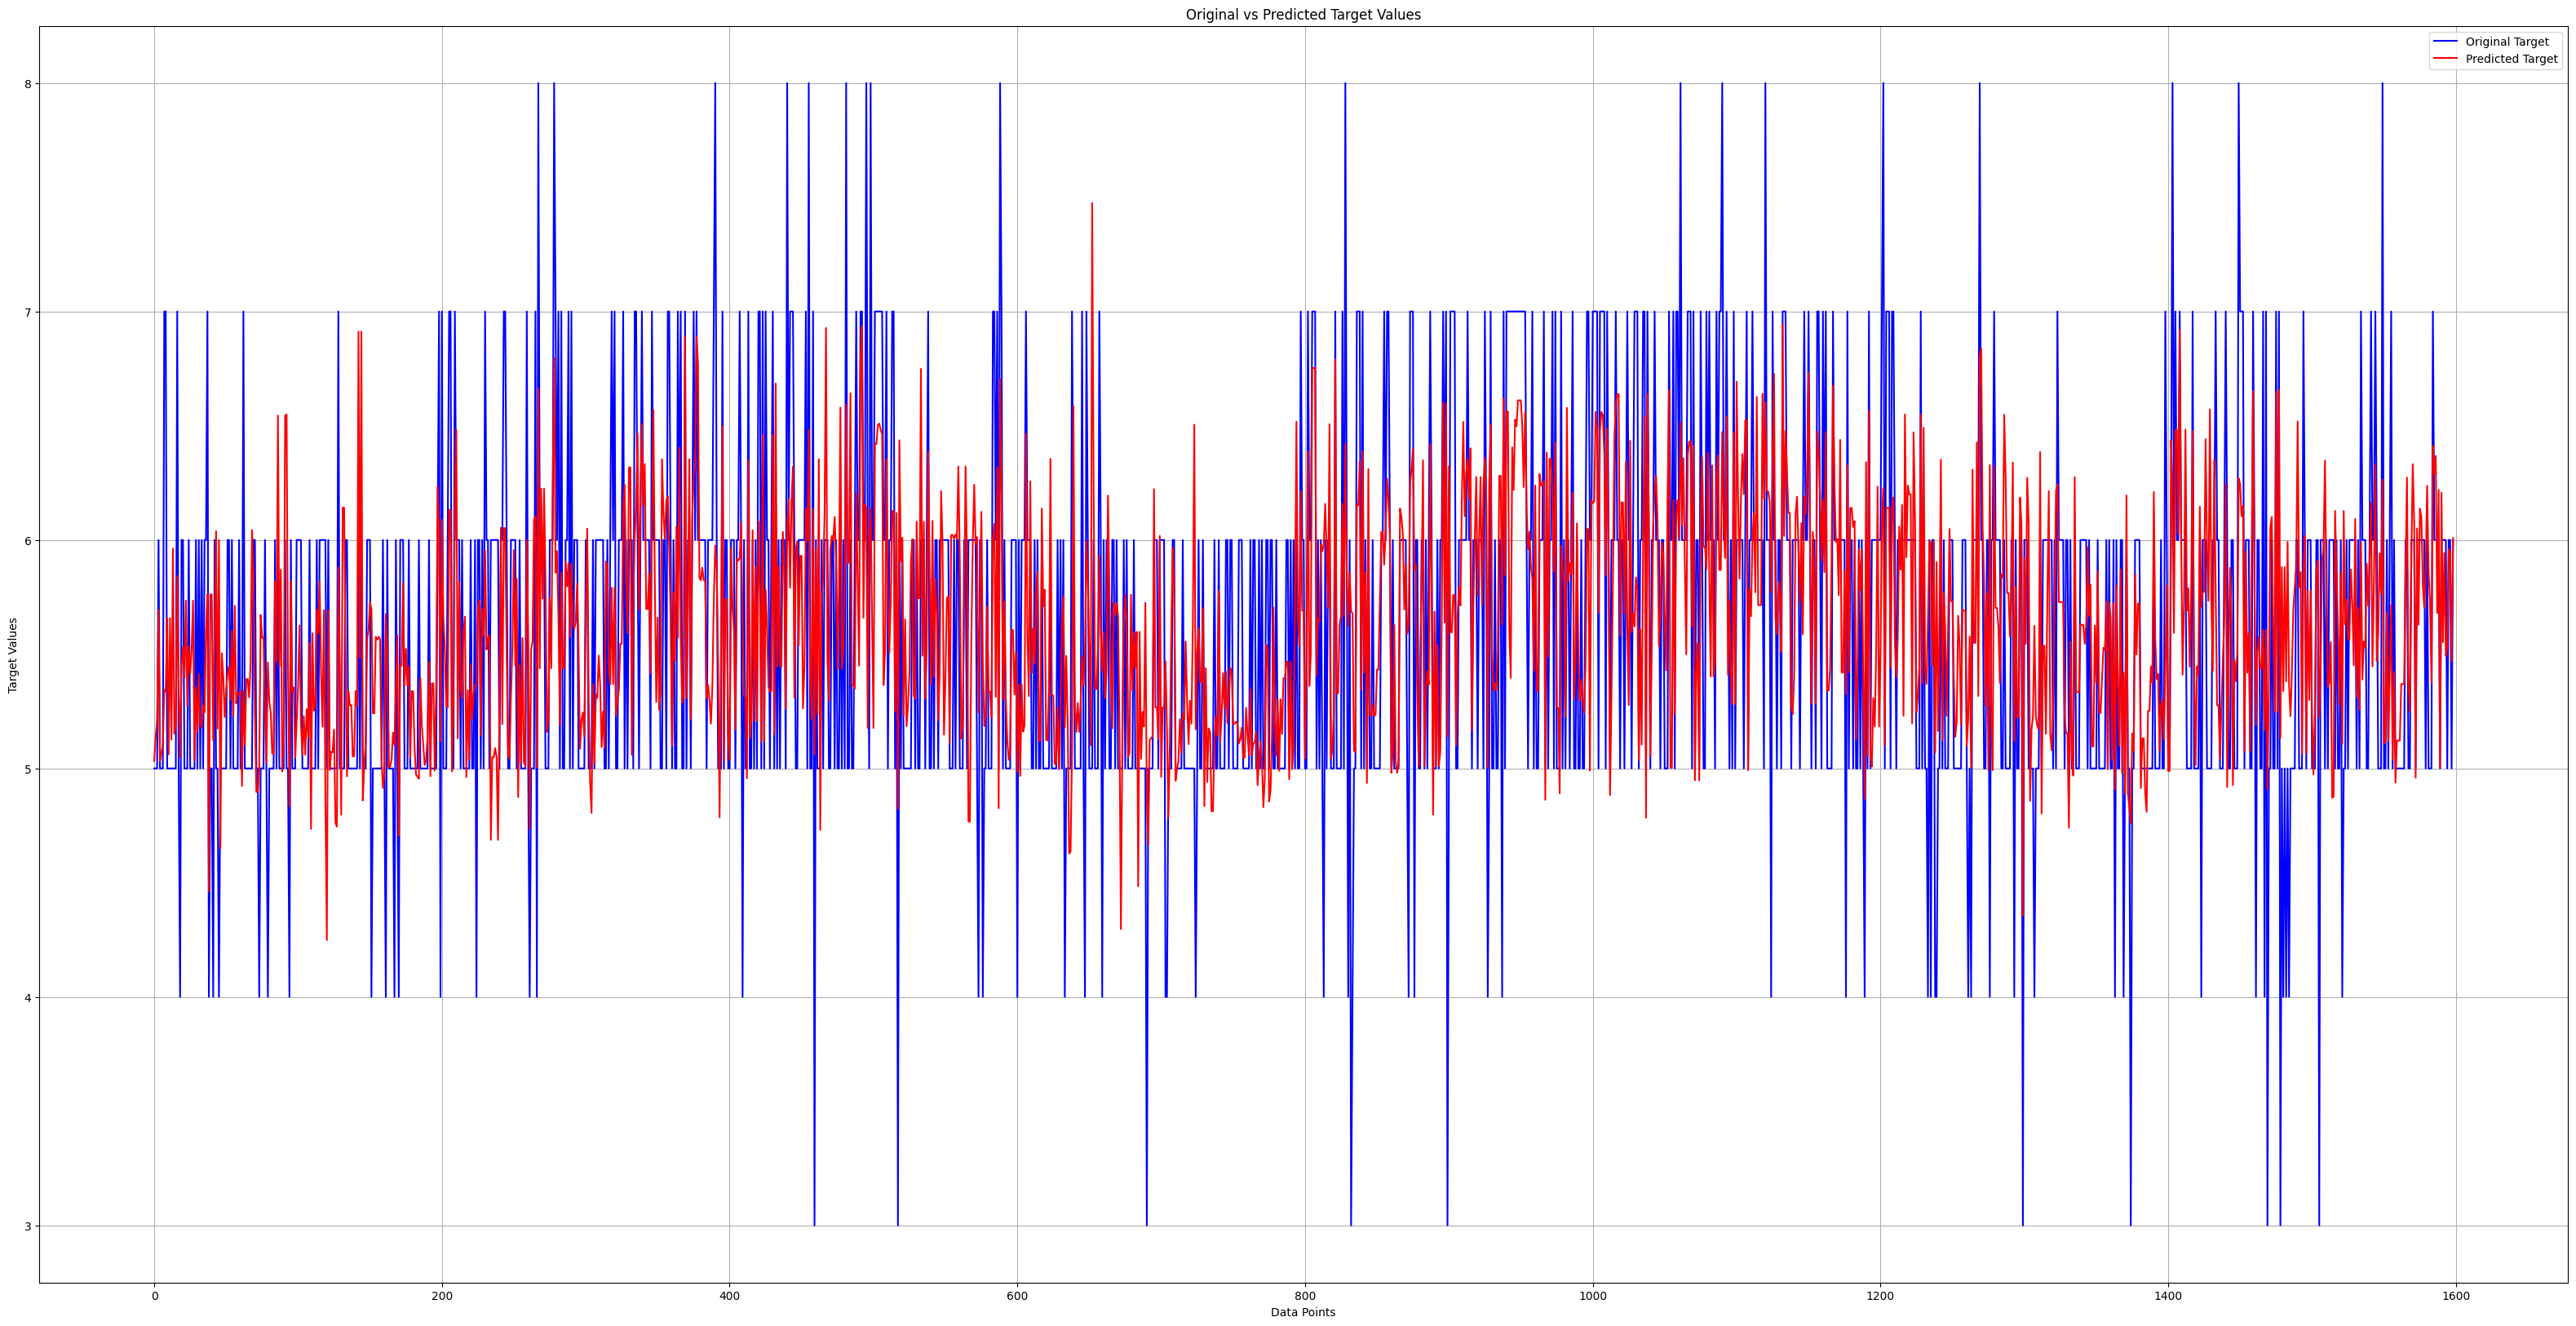

In [42]:
# Plotting original and predicted target values as lines
plt.figure(figsize=(40, 20))
plt.plot(y, color='blue', label='Original Target')  
plt.plot(y_pred, color='red', label='Predicted Target')  
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Original vs Predicted Target Values')
plt.legend()
plt.grid(True)
plt.show()

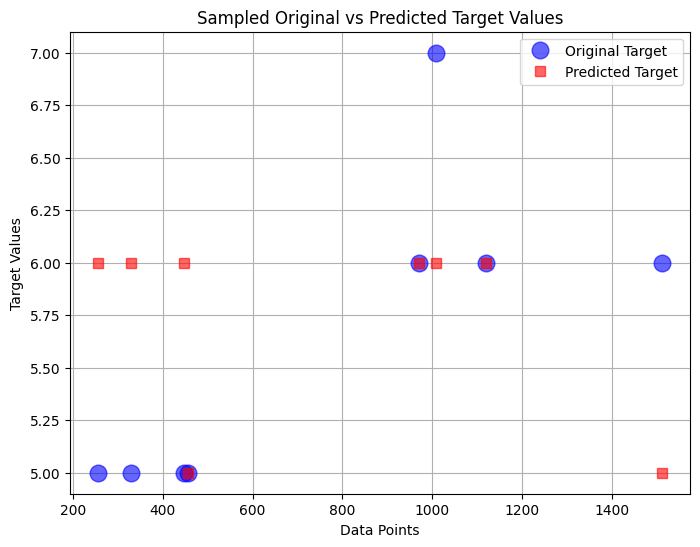

In [48]:
import numpy as np
import matplotlib.pyplot as plt

sample_size = 8  
sample_indices = np.random.choice(len(y), sample_size, replace=False)  

sampled_original_values = y[sample_indices]
sampled_predicted_values = rounded_values[sample_indices]

plt.figure(figsize=(8, 6))
plt.plot(sample_indices, sampled_original_values, marker='o', linestyle='', color='blue', label='Original Target', markersize=12, alpha=0.6)  # Marker plot for sampled original values with transparency
plt.plot(sample_indices, sampled_predicted_values, marker='s', linestyle='', color='red', label='Predicted Target', markersize=7, alpha=0.6)  # Marker plot for sampled predicted values with transparency
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Sampled Original vs Predicted Target Values')
plt.legend()
plt.grid(True)
plt.show()


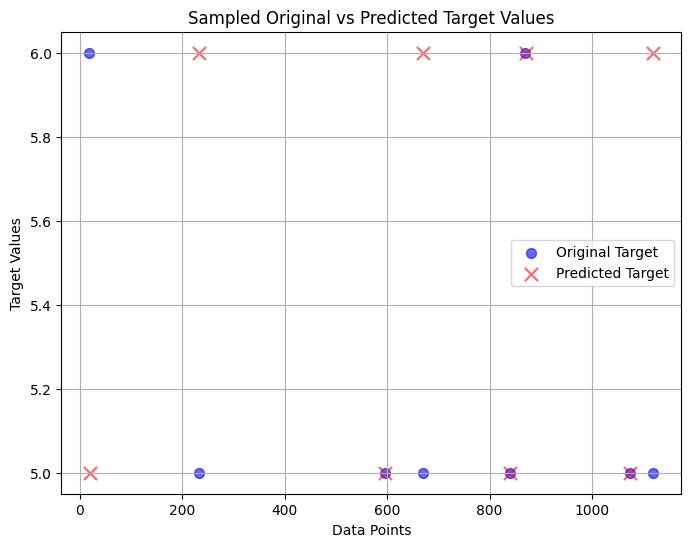

In [49]:
import numpy as np
import matplotlib.pyplot as plt



sample_size = 8  
sample_indices = np.random.choice(len(y), sample_size, replace=False)  

offset = 0.1

sampled_original_values = y[sample_indices]
sampled_predicted_values = rounded_values[sample_indices]

plt.figure(figsize=(8, 6))
plt.scatter(sample_indices - offset, sampled_original_values,marker='o', color='blue', label='Original Target', s=50, alpha=0.6)  # Scatter plot for sampled original values with transparency and offset
plt.scatter(sample_indices + offset, sampled_predicted_values,marker='x', color='red', label='Predicted Target', s=90, alpha=0.6)  # Scatter plot for sampled predicted values with transparency and offset
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Sampled Original vs Predicted Target Values')
plt.legend()
plt.grid(True)
plt.show()
